## Basic Data Science and ML Pipeline

1. Describe data to see if:-</br>
   a) there is any null value present</br>
   b) there is any sample with insufficient data</br>
2. Print first few lines of data to get a clue of the contents for each feature and identify the column label with the target variable.


In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("dataset/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


1. Notice that the `count` row is all equal, which means that the every sample has data for every feature

2. What is weird is that the minimum for `Glucose, BloodPressure, SkinThickness, Insulin, BMI` is 0! This is quite impossible in a real world case, which means that need to do some data cleaning to address this.

## Data Wrangling (Replace, Impute)

In [4]:
len(data.columns)

9

In [5]:
data_copy = data.copy(True)
data_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = data_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


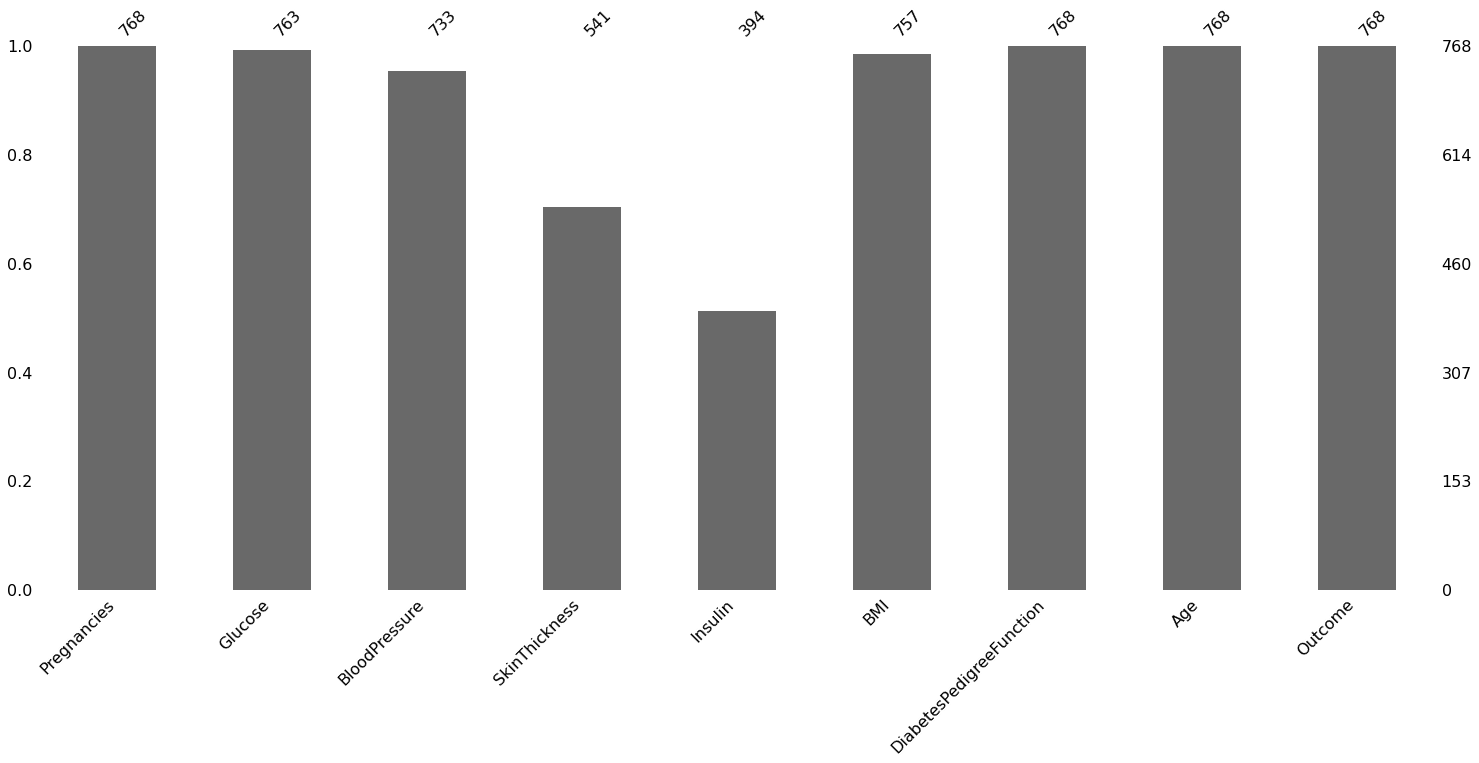

In [6]:
import missingno as msno
p = msno.bar(data_copy)

In [7]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Now that we have all this NaN values, how do we decide if we need to decide if we want to drop or if we want to impute.

Let's first visualize the histogram of these data, feature by feature.

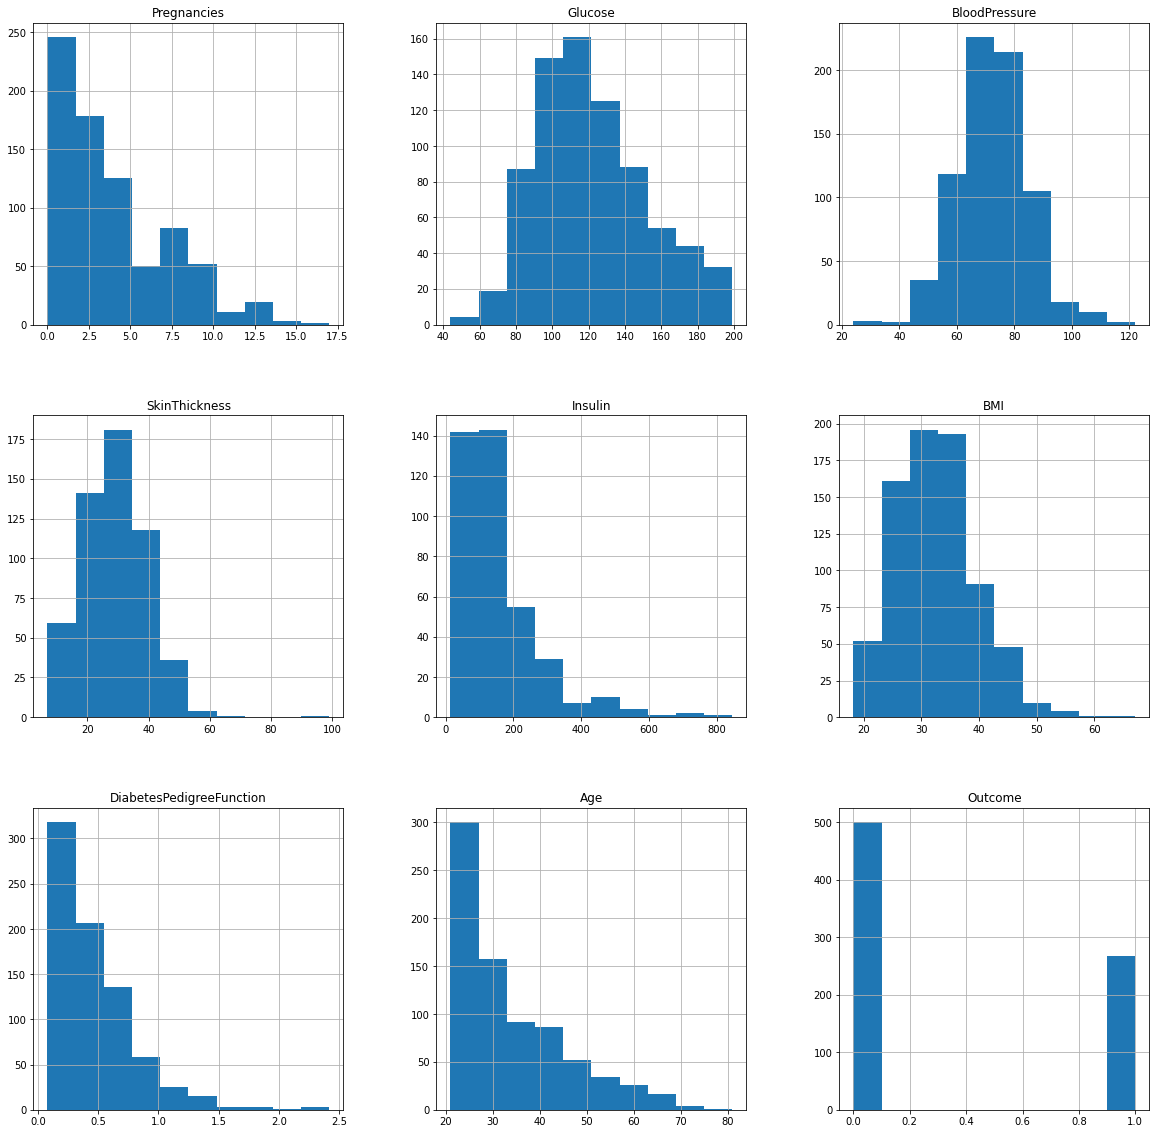

In [8]:
hist = data_copy.hist(figsize=(20,20))

In [9]:
from scipy.stats import skew
for col in data_copy:
    if col not in ["Pregnancies", "DiabetesPedigreeFunction","Age", "Outcome"]:
        print(f"Skewness for {col} is {skew(data_copy[col], nan_policy='omit')}") #use nan_policy = 'omit' to ignore nan values

Skewness for Glucose is 0.5299440812657646
Skewness for BloodPressure is 0.13387804741721224
Skewness for SkinThickness is 0.6887026971544087
Skewness for Insulin is 2.1582071470271145
Skewness for BMI is 0.5927921475626047


Since the "Glucose", "SkinThickness", "Insulin" and "BMI" columns has skewness > 0.5, I will use median imputation while the rest, I will use mean imputation.

Mean values represent every sample in the dataset, but if there is skewness, this means that the feature is influence by very high/low values. Thus it is not wise to impute the features that has skewness with mean. We can use median instead since it is more neutral.

Other ideas to consider:
1. Do a transformation on the dataset towards normality (maybe using simple functions like logarithmic or inverse transform) and after imputation, back-transform. [Source](https://stefvanbuuren.name/fimd/sec-nonnormal.html)


In [10]:
for col in data_copy:
    if col not in ["Pregnancies", "DiabetesPedigreeFunction","Age", "Outcome"]:
        skewness = skew(data_copy[col], nan_policy='omit')
        print("Skewness before imputation: ",skewness, col)
        if skewness > 0.5:
            # Impute with median
            data_copy[col].fillna(data_copy[col].median(), inplace=True)
            print("Imputed with median")
        else:
            # Impute with mean
            data_copy[col].fillna(data_copy[col].mean(), inplace=True)
            print("Imputed with mean")
        
        skewness = skew(data_copy[col], nan_policy='omit')
        print("Skewness after imputation: ",skewness, col, "\n")

Skewness before imputation:  0.5299440812657646 Glucose
Imputed with median
Skewness after imputation:  0.5345406664125946 Glucose 

Skewness before imputation:  0.13387804741721224 BloodPressure
Imputed with mean
Skewness after imputation:  0.1370370472689305 BloodPressure 

Skewness before imputation:  0.6887026971544087 SkinThickness
Imputed with median
Skewness after imputation:  0.8359714894564462 SkinThickness 

Skewness before imputation:  2.1582071470271145 Insulin
Imputed with median
Skewness after imputation:  3.3734139434873414 Insulin 

Skewness before imputation:  0.5927921475626047 BMI
Imputed with median
Skewness after imputation:  0.5980615087222572 BMI 



Skin thickness's skewness jumped by 0.2 after imputation!

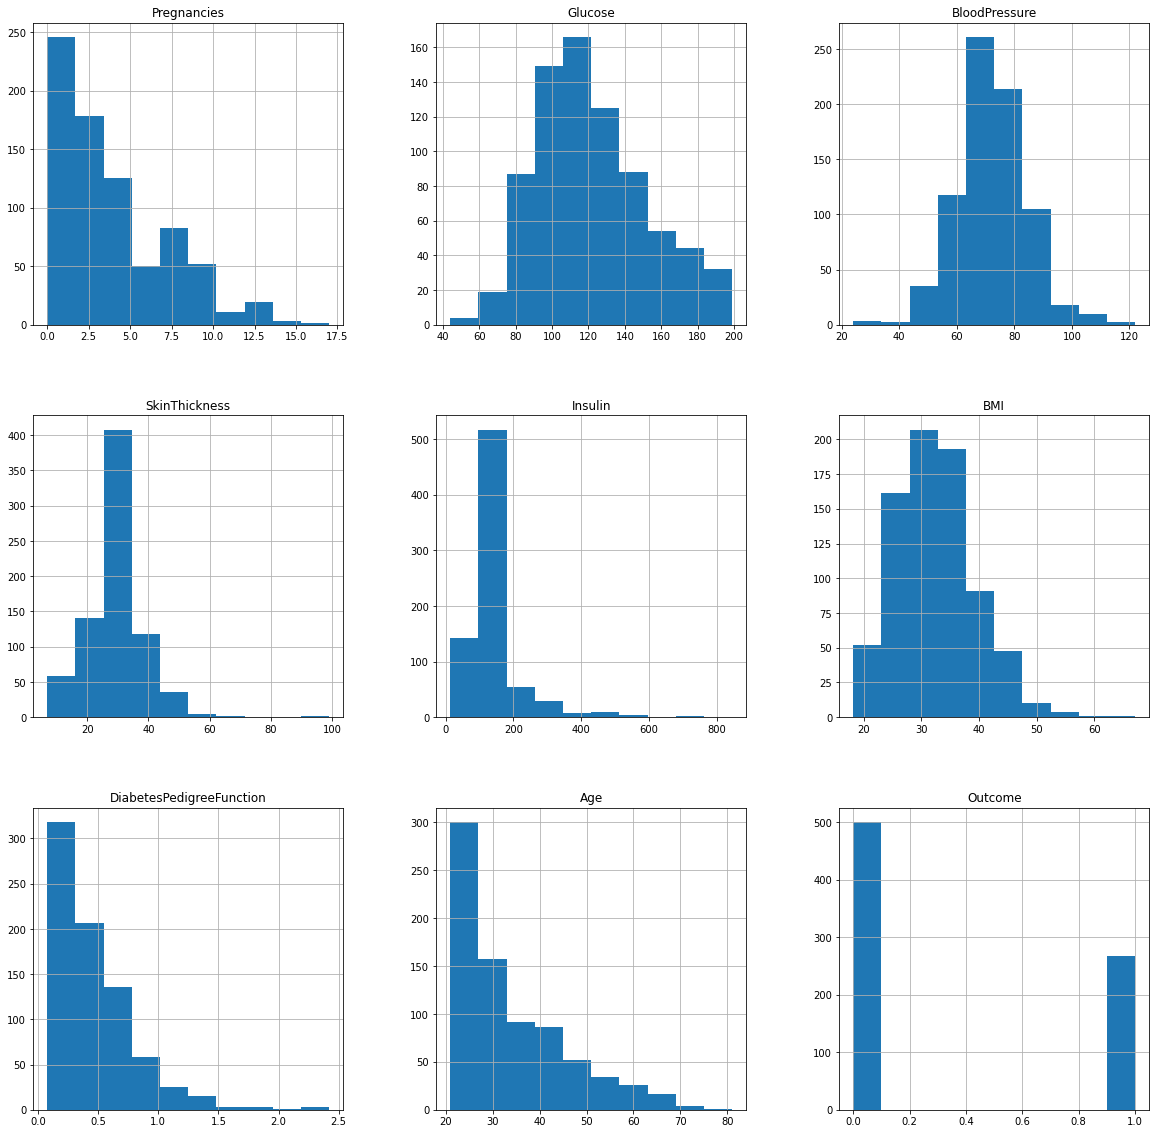

In [11]:
# plot histogram after imputation
hist = data_copy.hist(figsize=(20,20))

In [12]:
data_copy.shape

(768, 9)

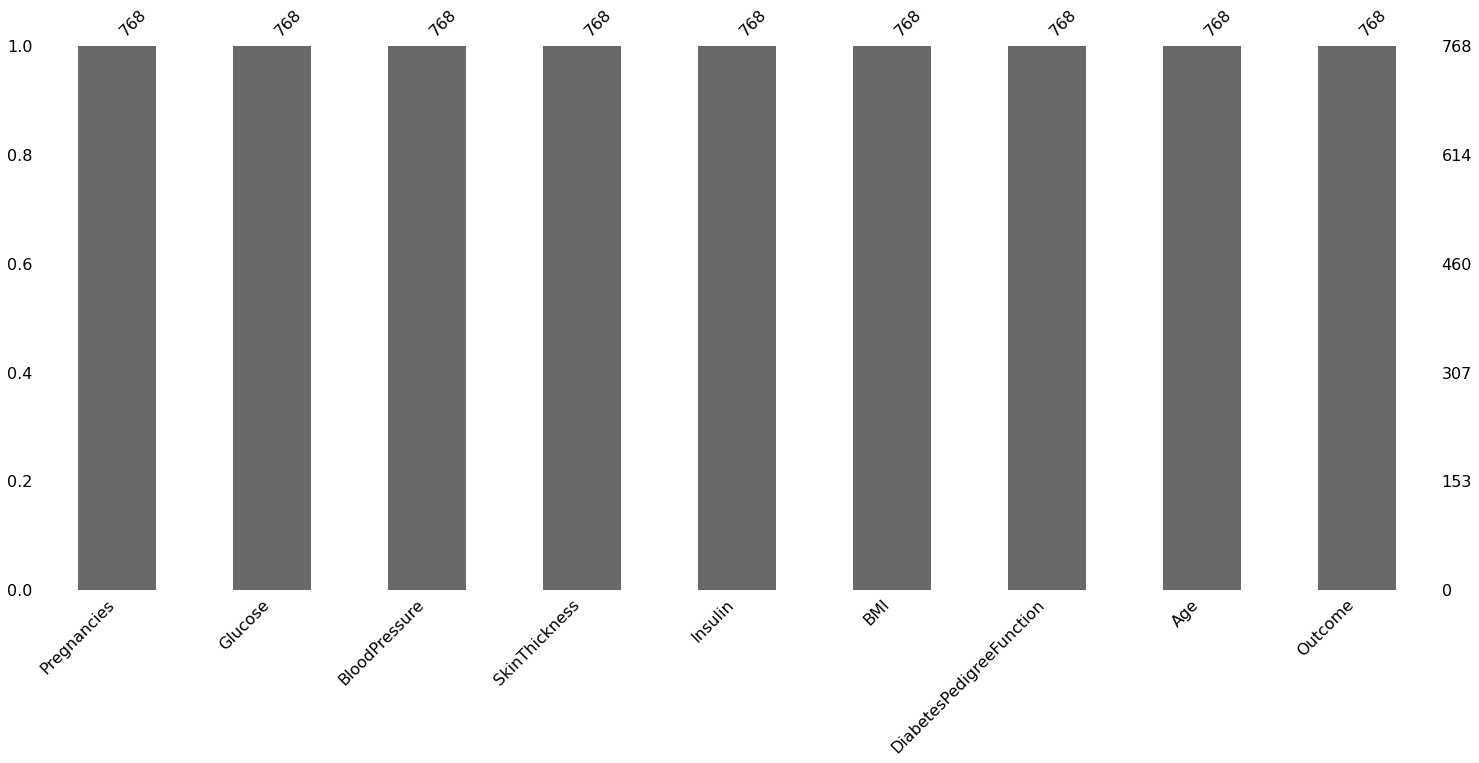

In [13]:
p = msno.bar(data_copy)

In [14]:
## Data type analysis
data.dtypes.value_counts()

int64      7
float64    2
dtype: int64

There are 7 integer typed features and 2 float typed features

0    500
1    268
Name: Outcome, dtype: int64


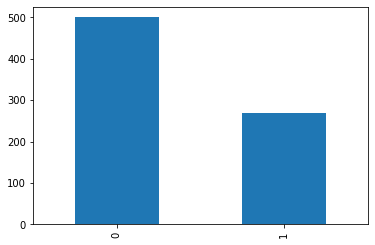

In [15]:
## check total counts in each class in the Outcome feature
print(data["Outcome"].value_counts())
p = data["Outcome"].value_counts().plot(kind="bar")

The data is imbalanced whereby non-diabetic class is twice more than the diabetic class.

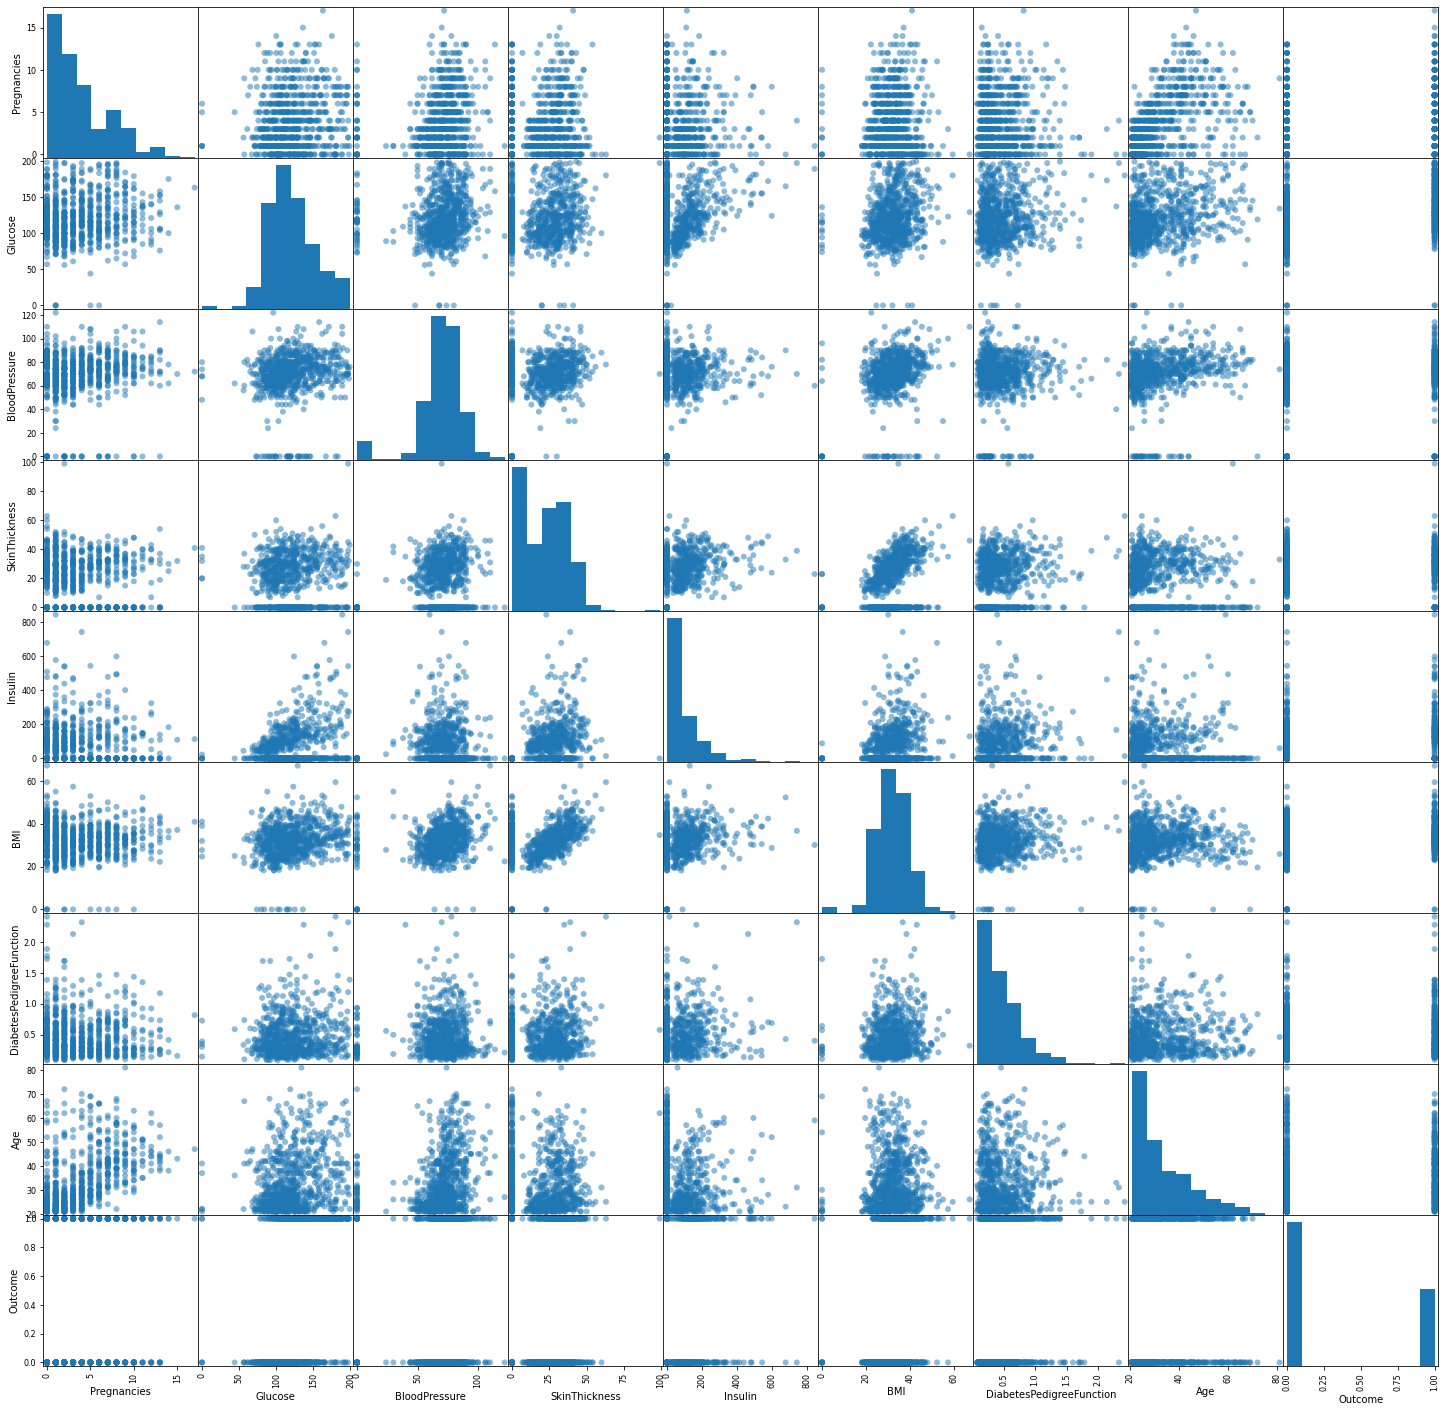

In [16]:
from pandas.plotting import scatter_matrix
p = scatter_matrix(data, figsize=(25,25), marker='o')

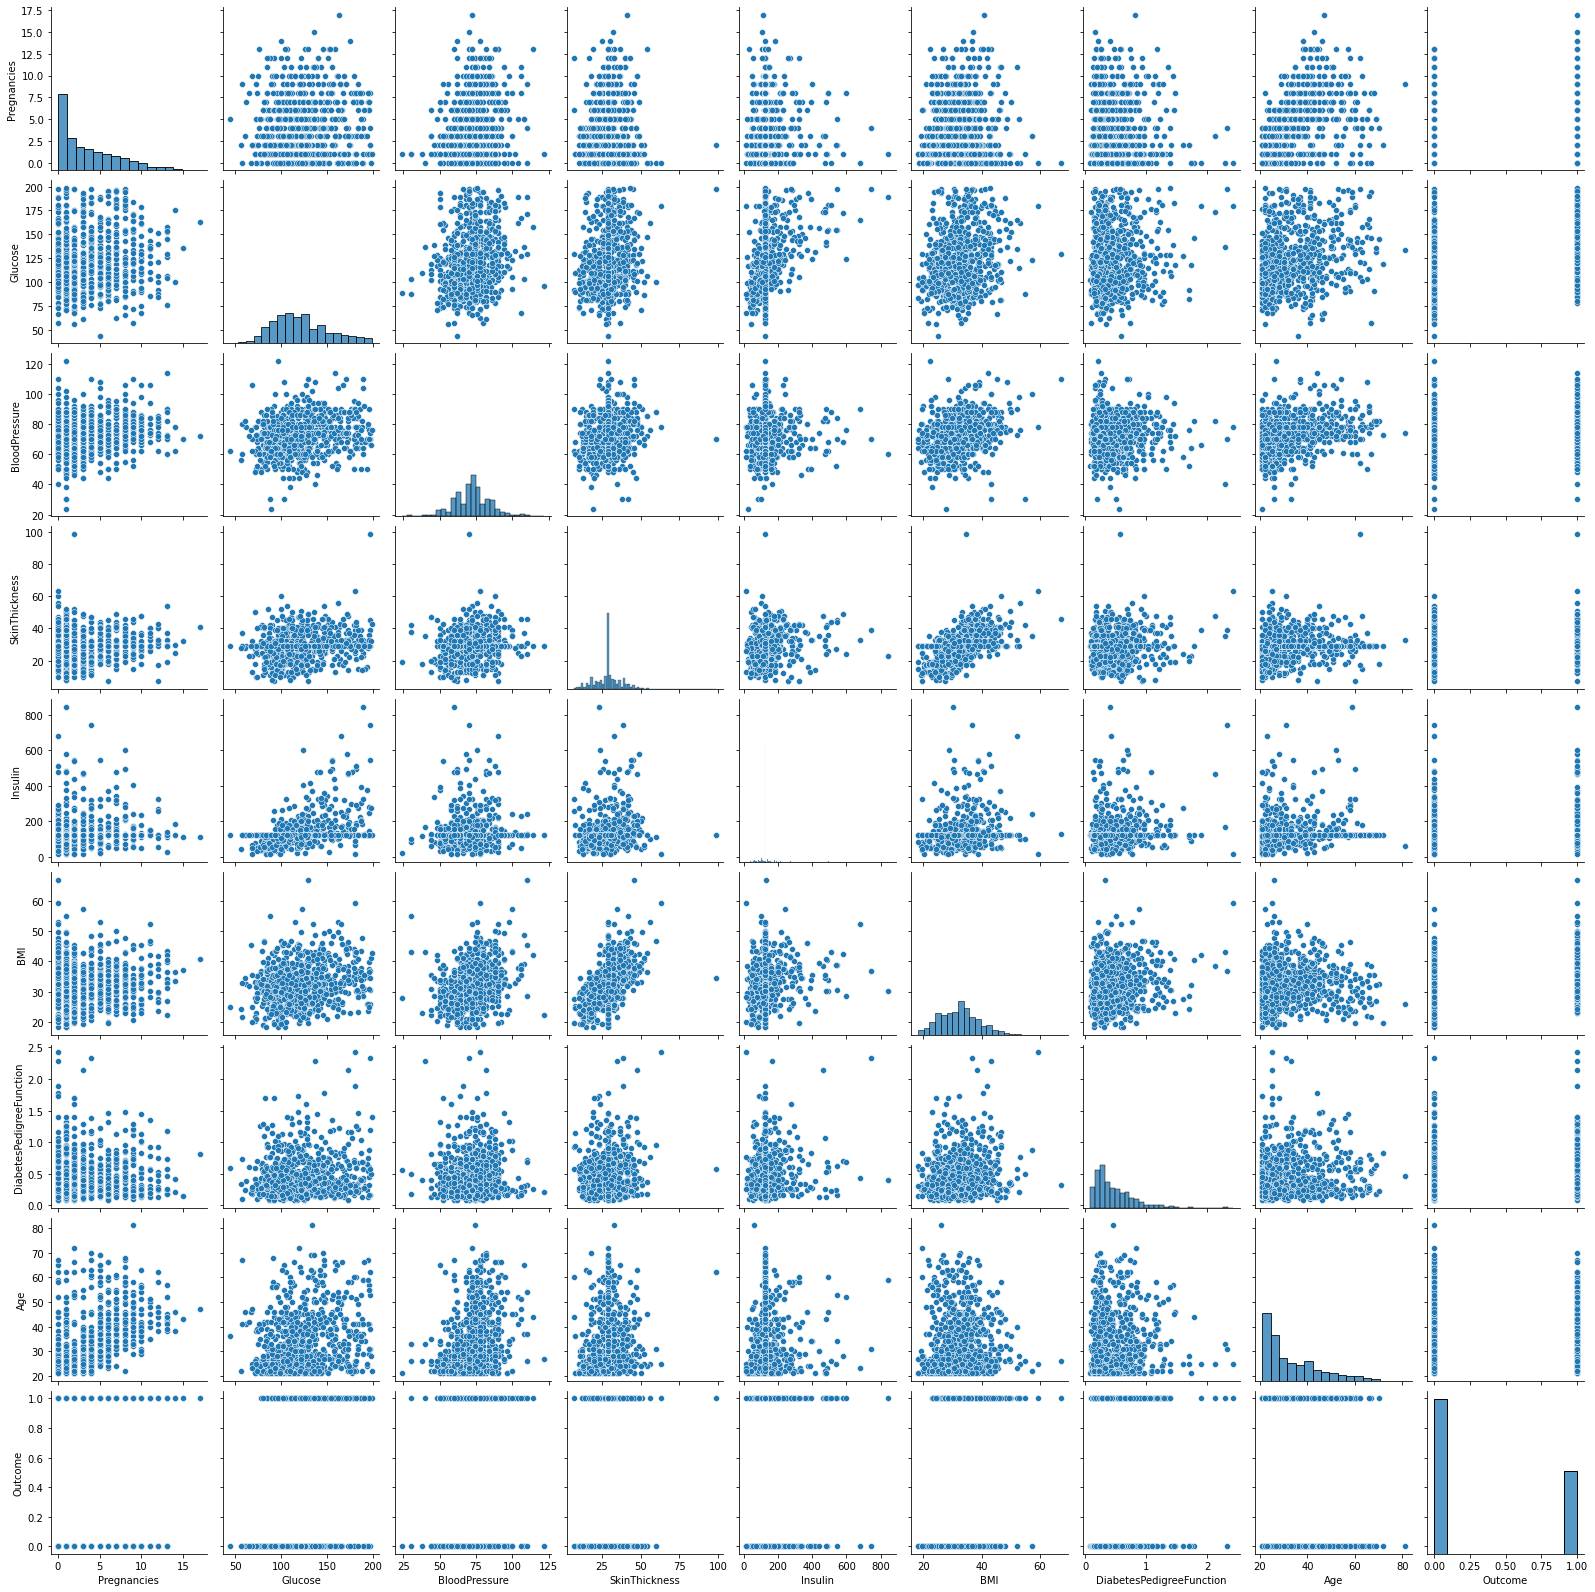

In [17]:
# we can also plot the scatter matrix (pairplots) using seaborn library
import seaborn as sns
p = sns.pairplot(data_copy)

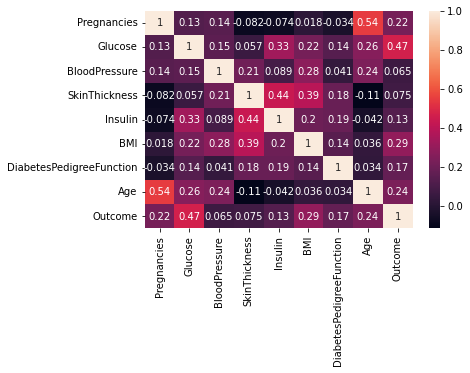

In [18]:
# correlation heatmap for the dirty data
p=sns.heatmap(data.corr(), annot=True)

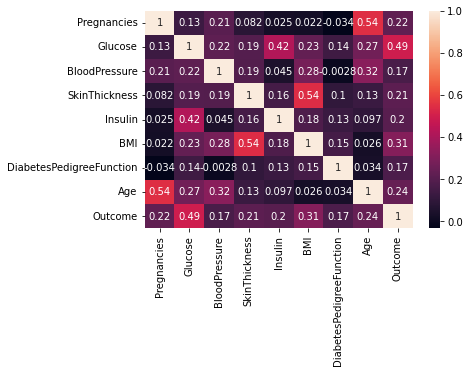

In [19]:
# correlation heatmap for the clean data
p=sns.heatmap(data_copy.corr(), annot=True)